<h1>Grid Search Random Forest</h1>

In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h3>A - Prepare for Grid Search</h3>

In [2]:
features_names = [
    'flight_id',
    'month-day',
    'month',
    'day_in_month',
    'adep', 
    'country_code_adep', 
    'ades', 
    'country_code_ades', 
    'aircraft_type', 
    'wtc', 
    'airline', 
    'flight_duration', 
    'taxiout_time', 
    'flown_distance', 
    'actual_offblock_time_hour', 
    'actual_offblock_time_minute', 
    'actual_offblock_time_hour_minute', 
    'arrival_time_hour', 
    'arrival_time_minute', 
    'arrival_time_hour_minute', 
    'latitude_median', 
    'longitude_median', 
    'altitude_mean', 
    'groundspeed_mean', 
    'track_mean', 
    'vertical_rate_mean', 
    'track_unwrapped_mean', 
    'u_component_of_wind_mean', 
    'v_component_of_wind_mean', 
    'temperature_mean', 
    'specific_humidity_mean'
]

target = 'tow'

In [3]:
encoded_challenge_set = pd.read_csv('../../data/encoded_challenge_set.csv')

# Pick up features from dataset
features = encoded_challenge_set[features_names]

# Pick up target from dataset
target = encoded_challenge_set[target]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)

In [4]:
# Function to score model using Root Mean Square Error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Make cross validation strategy
cv_strategy = KFold(n_splits=3, shuffle=True, random_state=123)

# Function to print the best parameters and best RMSE score after tunning
def print_model_score(grid_search):
    print("Best Parameters:", grid_search.best_params_)
    print("\nBest Score (Root Mean Squared Error):", grid_search.best_score_)

<h3>B - Perform Grid Search Random Forest Regressor</h3>

In [5]:
n_estimators = list(range(1,101,5)) # Testing 1 to 100 n-estimators with 5 intervall in between to avoid long run time.

param_grid = {
    'n_estimators': n_estimators,
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=cv_strategy,
    n_jobs=-1,  # Use all available cores
    verbose=2
)  # Print detailed progress

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print Grid Search Results
print_model_score(grid_search)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 96}

Best Score (Root Mean Squared Error): -3612.514102741398


<h3>Draw elbow graph</h3>

[-5284.13436844 -3923.3040265  -3787.44674698 -3723.37132281
 -3685.94965783 -3670.86490124 -3658.72664042 -3649.00840453
 -3639.96811173 -3632.18320997 -3630.36377299 -3625.91915172
 -3624.66341402 -3626.03390569 -3623.08386415 -3620.09501983
 -3614.77625101 -3616.36398493 -3614.14847536 -3612.51410274]


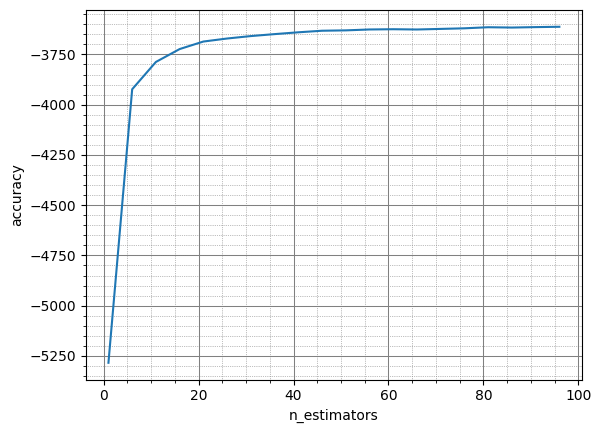

In [6]:
scores = grid_search.cv_results_['mean_test_score']
print(scores)


plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
#plt.xlim(0, 100)
#plt.ylim(0.9, 1)
plt.minorticks_on()
plt.grid(True)
# Add major grid
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.75)
# Add minor grid
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.show()

<h3>C - Evaluate Best Estimator</h3>

In [7]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_rmse = rmse(y_test, y_pred)
print("Test RMSE: ", test_rmse)

Test RMSE:  3541.8093948568335


<h3>D - Feature Importances</h3>

In [8]:
ft_imp = pd.Series(best_rf.feature_importances_, index=features_names).sort_values(ascending=False)
print(ft_imp)

wtc                                 0.853550
aircraft_type                       0.075917
flown_distance                      0.041802
airline                             0.012446
flight_duration                     0.005699
longitude_median                    0.001460
country_code_ades                   0.000881
adep                                0.000853
country_code_adep                   0.000720
altitude_mean                       0.000715
flight_id                           0.000670
ades                                0.000668
latitude_median                     0.000577
groundspeed_mean                    0.000359
arrival_time_hour_minute            0.000350
actual_offblock_time_hour_minute    0.000334
track_mean                          0.000307
month-day                           0.000302
vertical_rate_mean                  0.000288
specific_humidity_mean              0.000255
temperature_mean                    0.000252
u_component_of_wind_mean            0.000238
v_componen